<a href="https://colab.research.google.com/github/dzkha/DS-Unit-2-Regression-1/blob/master/module4-understanding-ols/regression_post_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

df = pd.read_csv('joined.csv') #Dataframe from previous day's assignment

In [2]:
df

,Unnamed: 0,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Aircraft,Air defence systems,Armoured vehicles,Artillery,Engines,Missiles,Naval weapons,Other,Sensors,Ships,Unnamed: 15,Total
0,0,1952,Stevenson,Eisenhower,44.60,5088.0,NaN,632.0,289.0,NaN,NaN,NaN,NaN,33.0,394.0,NaN,6436.0
1,1,1956,Eisenhower,Stevenson,57.76,5429.0,312.0,994.0,522.0,82.0,51.0,27.0,NaN,231.0,734.0,NaN,8382.0
2,2,1960,Nixon,Kennedy,49.91,2552.0,1144.0,533.0,202.0,100.0,517.0,64.0,NaN,143.0,801.0,NaN,6055.0
3,3,1964,Johnson,Goldwater,61.34,8827.0,1110.0,696.0,212.0,51.0,729.0,207.0,NaN,100.0,304.0,NaN,12235.0
4,4,1968,Humphrey,Nixon,49.60,5283.0,289.0,576.0,470.0,79.0,1229.0,23.0,NaN,104.0,394.0,NaN,8447.0
5,5,1972,Nixon,McGovern,61.79,7095.0,134.0,972.0,289.0,270.0,500.0,80.0,20.0,74.0,1352.0,NaN,10787.0
6,6,1976,Ford,Carter,48.95,10803.0,1293.0,982.0,277.0,189.0,1159.0,79.0,NaN,176.0,704.0,NaN,15662.0
7,7,1980,Carter,Reagan,44.70,5776.0,1219.0,420.0,142.0,218.0,1472.0,43.0,NaN,356.0,1083.0,NaN,10730.0
8,8,1984,Reagan,Mondale,59.17,7341.0,304.0,1180.0,442.0,276.0,1231.0,34.0,67.0,498.0,514.0,NaN,11887.0
9,9,1988,"Bush, Sr.",Dukakis,53.94,7567.0,426.0,624.0,152.0,255.0,1400.0,65.0,NaN,685.0,701.0,NaN,11875.0


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model = LinearRegression()

In [0]:
features = ['Aircraft', 
            'Armoured vehicles']

target = 'Incumbent Party Vote Share'

X = df[features]
y = df[target]

In [30]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred = model.predict(X)

In [45]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print("Mean absolute error:",mean_absolute_error(y, y_pred),'%')
print("Mean squared error:",mean_squared_error(y, y_pred),'%')
print("RMS error:",np.sqrt(mse),"%")
print("R2:",r2_score(y, y_pred))


Mean absolute error: 4.2033389910911305 %
Mean squared error: 26.182764827185803 %
RMS error: 4.991879526330749 %
R2: 0.08393811347842461


In [32]:
model.intercept_, model.coef_, 

(46.76251104217235, array([0.00066057, 0.00121098]))

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

print('Leave-One-Out Cross-Validation, Do-It-Yourself implementation:')

maes = []
r2s = []
mses = []
rmses = []

for year in df['Year']:
    print(f'Fit Linear Regression on all years except {year}')
    
    # Choose model hyperparamaters by instantiating this class
    model = LinearRegression()
    
    # Arrange data into X features matrix and y target vector
    train = df[df['Year'] != year]
    test = df[df['Year'] == year]
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]
    y_test = test[target]
    
    # Fit the model to your data by calling the fit() method of the estimator
    model.fit(X_train, y_train)
    
    # Apply the model to new data: predict labels for unknown data using predict() method
    y_pred = model.predict(X_test)
    
    print(y.shape,y_pred.shape)
    
    mae = mean_absolute_error(y_test, y_pred)
    maes.append(mae)
    print(f'Absolute Error on prediction for {year} = {mae}')
    
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)
    print(f'Mean squared error for {year} = {mse}')
    
    rmse = np.sqrt(mse)
    rmses.append(rmse)
    print(f'RMS error for {year} = {rmse}')
    
    r2 = r2_score(y, model.predict(X)) #Acts on entire set not just 2 tests
    r2s.append(r2)
    print(f'R2 for {year} = {r2}')
    

    

Leave-One-Out Cross-Validation, Do-It-Yourself implementation:
Fit Linear Regression on all years except 1952
(17,) (1,)
Absolute Error on prediction for 1952 = 6.89060515489485
Mean squared error for 1952 = 47.48043940066348
RMS error for 1952 = 6.89060515489485
R2 for 1952 = 0.07540382148618596
Fit Linear Regression on all years except 1956
(17,) (1,)
Absolute Error on prediction for 1956 = 6.67758228617749
Mean squared error for 1956 = 44.590105188671394
RMS error for 1956 = 6.67758228617749
R2 for 1956 = 0.07747866027716965
Fit Linear Regression on all years except 1960
(17,) (1,)
Absolute Error on prediction for 1960 = 1.0783540181460438
Mean squared error for 1960 = 1.162847388451718
RMS error for 1960 = 1.0783540181460438
R2 for 1960 = 0.08335646751763315
Fit Linear Regression on all years except 1964
(17,) (1,)
Absolute Error on prediction for 1964 = 9.994763880111321
Mean squared error for 1964 = 99.89530501917791
RMS error for 1964 = 9.994763880111321
R2 for 1964 = 0.04092784

In [0]:
#Taken from lecture

from mpl_toolkits import mplot3d

def viz3D(fitted_model, df, features, target='', num=100):
    """
    Visualize model predictions in 3D, for regression or binary classification
    
    Parameters
    ----------
    fitted_model : scikit-learn model, already fitted
    df : pandas dataframe, which was used to fit model
    features : list of strings, name of features 1 & 2
    target : string, name of target
    num : int, number of grid points for each feature
    
    References
    ----------
    https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html
    https://scikit-learn.org/stable/auto_examples/tree/plot_iris.html  
    """
    feature1, feature2 = features
    x1 = np.linspace(df[feature1].min(), df[feature1].max(), num)
    x2 = np.linspace(df[feature2].min(), df[feature2].max(), num)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.c_[X1.flatten(), X2.flatten()]
    if hasattr(fitted_model, 'predict_proba'):
        predicted = fitted_model.predict_proba(X)[:,1]
    else:
        predicted = fitted_model.predict(X)
    Z = predicted.reshape(num, num)
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis')
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_zlabel(target)
    plt.show()

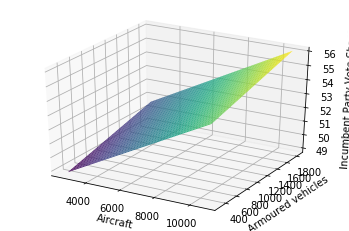

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
viz3D(model, df, features, target)

plt.show()